<ipython-input-1-9cd02fe48fc1>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df[pollution_col].resample('M').mean()
<ipython-input-1-9cd02fe48fc1>:21: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df[pollution_col].resample('Y').mean()


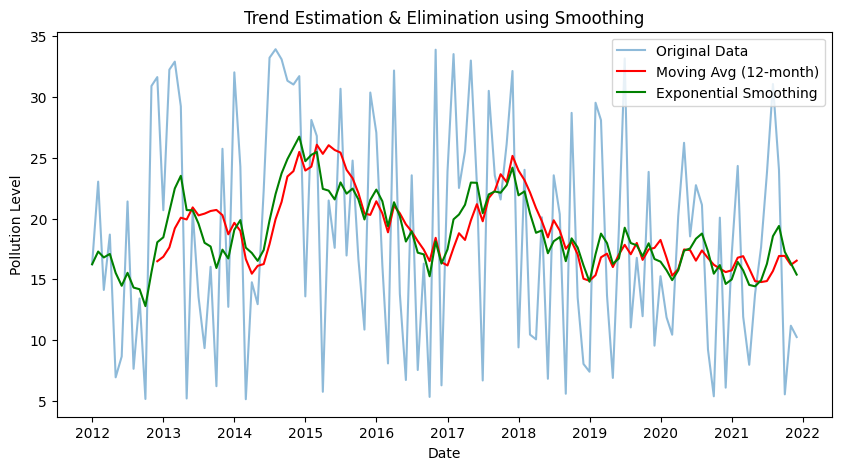

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/us_air_pollution_2012_2021_updated.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Select the pollution column (update the name if different)
pollution_col = "PM2.5 (µg/m³)"  # Update based on actual column name

# Filter data for 2012-2021
df = df[(df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2021)]

# Set Date as index
df.set_index('Date', inplace=True)

# Aggregation - Monthly & Yearly Average
df_monthly = df[pollution_col].resample('M').mean()
df_yearly = df[pollution_col].resample('Y').mean()

# Moving Average Smoothing (Rolling Mean)
df['Moving_Avg'] = df[pollution_col].rolling(window=12).mean()

# Exponential Smoothing
df['Exp_Smooth'] = df[pollution_col].ewm(span=12, adjust=False).mean()

# Plot Original vs Aggregated & Smoothed Data
plt.figure(figsize=(10, 5))
plt.plot(df[pollution_col], label="Original Data", alpha=0.5)
plt.plot(df['Moving_Avg'], label="Moving Avg (12-month)", color='red')
plt.plot(df['Exp_Smooth'], label="Exponential Smoothing", color='green')
plt.xlabel("Date")
plt.ylabel("Pollution Level")
plt.title("Trend Estimation & Elimination using Smoothing")
plt.legend()
plt.show()
